# Question 1

In [199]:
import torch
import numpy
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [200]:
torch.manual_seed(2)

#### Generate the dataset

In [201]:
N = 1000

# Create a linearly separable dataset of size N
x1 = torch.cat((torch.rand(N // 2, 1) * 2 + 1 , torch.rand(N // 2, 1) * 2 - 1), dim=1) # Points in the first and fourth quadrant -> Class 1
x0 = torch.cat((torch.rand(N // 2, 1) * 2 - 2 , torch.rand(N // 2, 1) * 2 + 2), dim=1) # Points in the second and third quadrant -> Class -1
x = torch.cat((x1, x0), dim=0)
y = torch.cat((torch.ones(N // 2), -torch.ones(N // 2)), dim=0)

#### Initial Classifier

In [202]:
# Defining the linear model parameters
w = torch.randn(2)
k = 1000 # Number of iterations

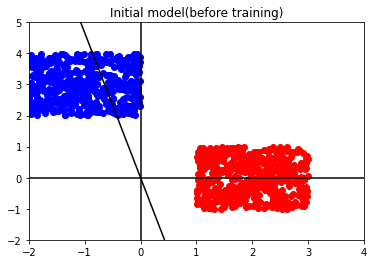

In [203]:
plt.scatter(x1[:, 0], x1[:, 1], c='r')
plt.scatter(x0[:, 0], x0[:, 1], c='b')
plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.plot(np.linspace(-3, 4, 100), -w[0]/w[1] * np.linspace(-3, 4, 100), color='k')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('Initial model(before training)')
plt.show()

### Training

In [204]:
# level of separation: gamma
gamma = [1,3,5,7,9]

# Perceptron algorithm
while k > 0:
    count = 0
    for i in range(N):
        if torch.sign(torch.dot(w, x[i])) * y[i] <= 0:
            w = w + y[i] * x[i]
        else:
            count += 1
    if count == N:
        print(f'No of iterations required: {999 - k}')
        break
    k -= 1

No of iterations required: 1


#### Plot after training

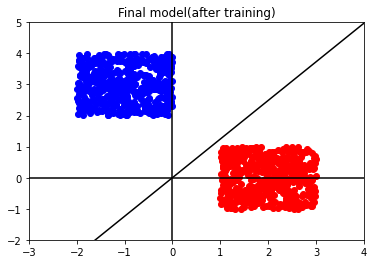

In [205]:
plt.scatter(x1[:, 0], x1[:, 1], c='r')
plt.scatter(x0[:, 0], x0[:, 1], c='b')
plt.xlim(-3, 4)
plt.ylim(-2, 5)

# Plotting the separating line
plt.plot(np.linspace(-3, 4, 100), -w[0]/w[1] * np.linspace(-3, 4, 100), color='k')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('Final model(after training)')
plt.show()

#### Observations
It can be seen that as the level of separatibility increases, the the number of iterations required for the perceptron algorithm decreases.

# Question 2

In [206]:
N = 1000

# Create a linearly separable dataset of size N
x1 = torch.cat((torch.rand(N // 2, 1) * 2 + 1 , torch.rand(N // 2, 1) * 2 - 1), dim=1) # Points in the first and fourth quadrant -> Class 1
x0 = torch.cat((torch.rand(N // 2, 1) * 2 - 2 , torch.rand(N // 2, 1) * 2 + 2), dim=1) # Points in the second and third quadrant -> Class -1
x = torch.cat((x1, x0), dim=0) # size: N x 2
y = torch.cat((torch.ones(N // 2), torch.zeros(N // 2)), dim=0)

### Initial classifier

In [207]:
w = torch.randn(2) # size: 2
alpha = 1 # Learning rate
n_iter = 50 # Number of iterations

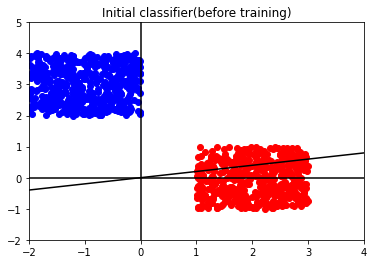

In [208]:
plt.scatter(x1[:, 0], x1[:, 1], c='r')
plt.scatter(x0[:, 0], x0[:, 1], c='b')
plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.plot(np.linspace(-3, 4, 100), -w[0]/w[1] * np.linspace(-3, 4, 100), color='k')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('Initial classifier(before training)')
plt.show()

In [209]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def log_loss(x, w, y):
    return torch.mean(- y * torch.log(sigmoid(x @ w)) - (1 - y) * torch.log(1 - sigmoid(x @ w)))

def log_loss_grad(x, w, y):
    op = x.T @ (sigmoid(x @ w) - y) # 2 X N @ N X 1 = 2 X 1
    return op

In [210]:
# Notice that the loss is decreasing with each iteration
for i in range(n_iter):
    loss = log_loss(x, w, y)
    print(i, loss.item())
    w = w - alpha * log_loss_grad(x, w, y) / N

0 0.49416112899780273
1 0.15668679773807526
2 0.10933299362659454
3 0.08571876585483551
4 0.07122833281755447
5 0.06131256744265556
6 0.05404781922698021
7 0.0484689325094223
8 0.04403432086110115
9 0.040414951741695404
10 0.0373985655605793
11 0.03484172746539116
12 0.03264378756284714
13 0.030731895938515663
14 0.029051966965198517
15 0.027562929317355156
16 0.026233011856675148
17 0.025037234649062157
18 0.023955661803483963
19 0.022972173988819122
20 0.022073600441217422
21 0.021249059587717056
22 0.020489487797021866
23 0.01978726126253605
24 0.01913592591881752
25 0.018529966473579407
26 0.01796465553343296
27 0.017435913905501366
28 0.016940191388130188
29 0.016474399715662003
30 0.016035815700888634
31 0.015622061677277088
32 0.015231014229357243
33 0.014860796742141247
34 0.014509739354252815
35 0.014176350086927414
36 0.013859277591109276
37 0.01355732697993517
38 0.013269401155412197
39 0.01299451757222414
40 0.012731783092021942
41 0.012480382807552814
42 0.0122395865619182

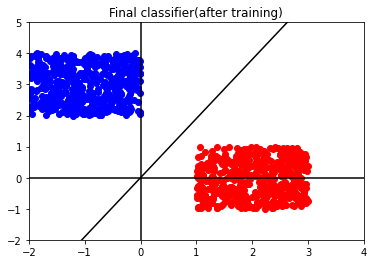

In [211]:
plt.scatter(x1[:, 0], x1[:, 1], c='r')
plt.scatter(x0[:, 0], x0[:, 1], c='b')
plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.plot(np.linspace(-3, 4, 100), -w[0]/w[1] * np.linspace(-3, 4, 100), color='k')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('Final classifier(after training)')
plt.show()

# Question 3

### Creating Dataset

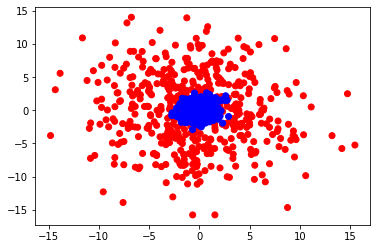

In [212]:
N = 1000

# Create a random dataset from a normal distribution
# Move the points belonging to 1 class  to a larger radius along their unit vector
X = torch.randn(N, 2)
for i in range(N // 2):
    unit_vector = X[i] / np.linalg.norm(X[i])
    norm_X_i = np.linalg.norm(X[i])
    X[i] = unit_vector * (norm_X_i * 5)

Y = torch.cat((torch.ones(N // 2), -torch.ones(N // 2)), dim=0)
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap='bwr')
plt.show()

### Activation Functions

In [213]:
def sigmoid(x):
  return(1/(1 + torch.exp(-0.1*x)))

def ReLU(x):
  return(np.maximum(0, x))

def sigmoid_derivative(x):
  return(sigmoid(x)*(1-sigmoid(x)))

def ReLU_derivative(x):
  return(1. * (x > 0))

#### Forward propagation:
For each layer,
<ol>
    <li>Calculate z = w.x + b</li>
    <li>Calculate a = sigmoid(z)</li>
    <li>Store z and a in a list</li>
    <li>Return the list of z and a</li>
</ol>
    for every point in the training set.

#### Backward Propagation
For each layer,
<ol>
    <li>Calculate delta:
        <ul>
            <li> for last layer: delta = Cost derivative * sigmoid derivative for last layer (* is element wise multiplication)</li>
            <li>for other layers: delta = (weights of next layer)T * delta of next layer * sigmoid derivative of current layer (* is element wise multiplication) </li>
        </ul>
    </li>
    <li>Calculate b_grads = delta</li>
    <li>Calculate w_grads = delta * activations of previous layer (output is a matrix)</li>
</ol>
    Return b_grads and w_grads(averaged over all training examples) for each layer in a list

In [214]:
class MultiLayerPerceptron:
    def __init__(self, layer_sizes, activation_functions, activation_functions_derivative, X_train, y_train):
        self.layer_sizes = layer_sizes
        self.activation_functions = activation_functions
        self.activation_functions_derivative = activation_functions_derivative
        self.num_layers = len(layer_sizes)
        self.biases = [torch.randn(layer_size, 1) for layer_size in layer_sizes[1:]]
        self.weights = [torch.randn(layer_size, layer_sizes[index-1]) for index, layer_size in enumerate(layer_sizes) if index != 0]
        self.X_train = X_train
        self.y_train = y_train

    def forward_propagation(self, X_batch):
        activations = [X_batch]
        zs =[]
        for index, layer_size in enumerate(self.layer_sizes):
            if index == len(self.layer_sizes) - 1:
                break
            z = activations[-1] @ self.weights[index].T + self.biases[index].T
            zs.append(z)
            activations.append(self.activation_functions(z))

        # activations of size: num_layers + 1
        # zs of size: num_layers
        return (zs, activations)

    def back_propagation(self, X_batch, y_batch, zs, activations):
        b_grads = [torch.zeros(bias.shape) for bias in self.biases]
        w_grads = [torch.zeros(weight.shape) for weight in self.weights]

        # reshape y_batch to 1 X 1
        y_batch = y_batch.reshape(-1, 1)

        # cross entropy loss gradient
        delta = - (y_batch / activations[-1]) + ((1 - y_batch) / (1 - activations[-1])) # 600 X 1

        b_grads[-1] = torch.mean((activations[-1] - y_batch) * self.activation_functions_derivative(zs[-1]), dim=0).reshape(-1, 1)
        w_grads[-1] = torch.mean(delta * activations[-2], dim=0).reshape(1, -1) # (600 X 10) -> (10 X 1).T = (1 X 10)

        for i in range(self.num_layers - 2, 0, -1):
            delta = (delta @ self.weights[i]) * self.activation_functions_derivative(zs[i-1]) # 600 X 10

            b_grads[i-1] = delta.mean(dim=0).reshape(-1, 1) # 10 X 1

            w_grads[i-1] = torch.zeros(w_grads[i-1].shape) # 10 X 2
            for j in range(X_batch.shape[0]):
                w_grads[i-1] += delta[j].reshape(-1, 1) @ activations[i-1][j].reshape(-1, 1).T # 10 X 1 * 1 X 2 = 10 X 2
            w_grads[i-1] = w_grads[i-1] / X_batch.shape[0]
        
        return (b_grads, w_grads)
    
    # Trains the network using gradient descent with backpropagation
    # alpha is the learning rate
    def train(self, n_iter, alpha, batch_size = 100, epochs = 10):
        for i in range(epochs):
            batch_indices = torch.randperm(self.X_train.shape[0])
            X_batch, y_batch = self.X_train[batch_indices], self.y_train[batch_indices]
            zs, activations = self.forward_propagation(X_batch)

            for j in range(n_iter):
                b_grads, w_grads = self.back_propagation(X_batch, y_batch, zs, activations)

                for index, layer_size in enumerate(self.layer_sizes):
                    if index == 0:
                        continue
                    assert(b_grads[index-1].shape == self.biases[index-1].shape)
                    assert(w_grads[index-1].shape == self.weights[index-1].shape)
                    self.biases[index-1] -= alpha * b_grads[index-1]
                    self.weights[index-1] -= alpha * w_grads[index-1]
            print(f"Epoch {i + 1}: Accuracy: {self.evaluate(self.X_train, self.y_train)}")

    def evaluate(self, X, y):
        zs, activations = self.forward_propagation(X)
        a = activations[-1] > 0.5
        y = y.reshape(-1, 1)
        d = (a == y).float()
        return torch.mean(d, dim=0).item()

In [215]:
obj = MultiLayerPerceptron([2, 10, 1], sigmoid, sigmoid_derivative, x, y)

In [216]:
obj.train(n_iter=40, alpha=0.04, batch_size=1000, epochs=10)

Epoch 1: Accuracy: 0.871999979019165
Epoch 2: Accuracy: 0.9639999866485596
Epoch 3: Accuracy: 0.9950000047683716
Epoch 4: Accuracy: 0.9990000128746033
Epoch 5: Accuracy: 1.0
Epoch 6: Accuracy: 1.0
Epoch 7: Accuracy: 1.0
Epoch 8: Accuracy: 1.0
Epoch 9: Accuracy: 1.0
Epoch 10: Accuracy: 1.0
